In [54]:
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:
pwd

'C:\\Users\\Gautam'

In [36]:
deliveries = pd.read_csv('C:\\Users\\Gautam\deliveries.csv')
matches = pd.read_csv('C:\\Users\\Gautam\matches.csv')

deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


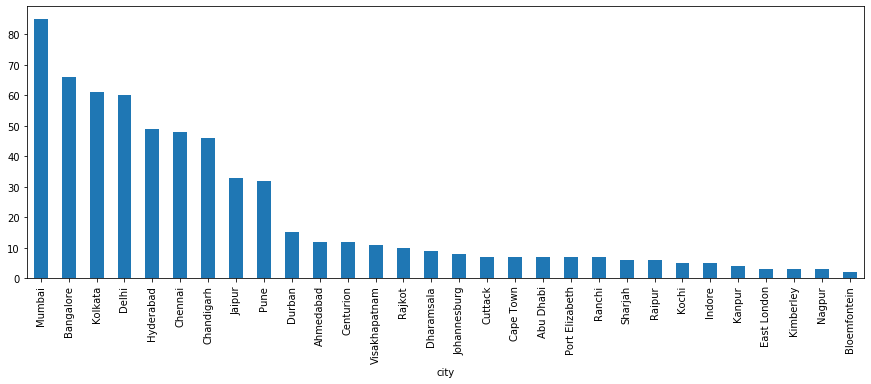

In [73]:
#Cities with most Matches
deliveries = pd.read_csv('C:\\Users\\Gautam\deliveries.csv')
matches = pd.read_csv('C:\\Users\\Gautam\matches.csv')

city = matches.groupby([matches.city]).city.count().sort_values(ascending=False)
plt.figure(figsize=(15,5))
city.plot(kind="bar")

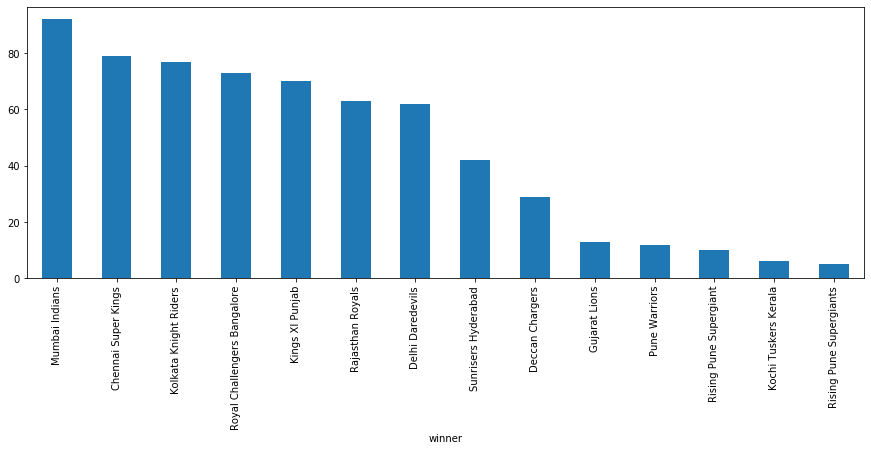

In [17]:
winner = matches.groupby(matches.winner).winner.count().sort_values(ascending=False)
plt.figure(figsize=(15,5))
winner.plot(kind='bar')

In [22]:
#Most Player of the match Awards
s_man_of_match = matches.groupby(matches.player_of_match).player_of_match.count().sort_values(ascending=False).head(15)
df_man_of_match =s_man_of_match.to_frame()
df_man_of_match

,player_of_match
player_of_match,
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
SK Raina,14
RG Sharma,14
G Gambhir,13
MS Dhoni,13
AM Rahane,12


In [29]:
s_fielding = deliveries.loc[condition_fielding,:].groupby(deliveries.fielder).dismissal_kind.count().sort_values(ascending=False)
df_fielding= s_fielding.to_frame()
df_fielding.columns = ['fielding']
df_fielding.head(15)

,fielding
fielder,
KD Karthik,101
MS Dhoni,96
SK Raina,96
AB de Villiers,94
RV Uthappa,83
RG Sharma,79
V Kohli,74
NV Ojha,72
KA Pollard,72


In [32]:
#Player Performance Throughout
#Lets check overall performance of player setting some rule Rules for Points:

#Batting

#Base Points :1 point per run.
#2 points for every six

#Bowling

#Base Points :20 points per wicket taken.
#Fielding *10 points for each catch resulting in a fall of wicket.

#10 points for a run-out and stumping
#Bonus Point

#25 points for being declared the Man of the Match ;

In [37]:
#df_points = g5[['ball','Strike Rate','match count','average score','batsman run','six','Man of Match']]
df_points = df_batsman_stat[['Ball','Strike Rate','Average score','Batsman Run','Six']]
#print(df_points.head(10))
df_points['Six pts'] = df_points['Six']*2
df_points = pd.merge(pd.merge(df_points.merge(df_bowlers, left_index=True, right_index=True), df_fielding, left_index=True, right_index=True, how='left'), df_man_of_match, left_index=True, right_index=True, how='outer')
df_points.fillna(value=0, inplace=True)
df_points['dismissal_kind'] = df_points['dismissal_kind'] *20
df_points['fielding'] = df_points['fielding'] *10
#print(df_points.head(10))
df_points['Man of Match pts'] = df_points['player_of_match']*25
df_points['Total Point'] = df_points['Batsman Run']+ df_points['Six']+df_points['dismissal_kind']+df_points['Man of Match pts']+df_points['fielding']
df_points = df_points.drop('player_of_match',1)
df_points = df_points.drop('Six',1)
df_points.rename({'dismissal_kind':'bowling pts'}, axis=1, inplace=True)
df_points.rename({'fielding':'fielding pts'}, axis=1, inplace=True)
df_points.rename({'batsman run':'batsman run pts'}, axis=1, inplace=True)
#df_points['Points per match'] =df_points['Total Point']/df_points['match count']
df_points.sort_values(by='Total Point',ascending=False,inplace=True)
df_points.head(25)

,Ball,Strike Rate,Average score,Batsman Run,Six pts,bowling pts,Run Rate,fielding pts,Man of Match pts,Total Point
SK Raina,3369.0,134.995548,28.968153,4548.0,348.0,500.0,7.596210,960.0,350.0,6532.0
RG Sharma,3274.0,128.497251,27.496732,4207.0,346.0,300.0,8.341580,790.0,350.0,5820.0
V Kohli,3494.0,126.588437,31.368794,4423.0,320.0,80.0,8.623894,740.0,275.0,5678.0
SR Watson,1949.0,134.838379,26.816327,2628.0,244.0,1720.0,7.768940,330.0,250.0,5050.0
CH Gayle,2532.0,144.194313,36.510000,3651.0,532.0,360.0,8.442330,240.0,450.0,4967.0
YK Pathan,2076.0,140.751445,21.969925,2922.0,298.0,820.0,7.766181,460.0,400.0,4751.0
DJ Bravo,1032.0,122.286822,15.580247,1262.0,96.0,2440.0,7.998479,640.0,0.0,4390.0
JH Kallis,2291.0,105.936272,25.547368,2427.0,88.0,1300.0,7.945536,330.0,250.0,4351.0
KA Pollard,1674.0,140.621266,21.017857,2354.0,296.0,1120.0,8.978914,720.0,0.0,4342.0
S Dhawan,3005.0,118.502496,28.261905,3561.0,142.0,80.0,8.467949,540.0,0.0,4252.0


In [39]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [41]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [43]:
m_data = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
m_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,05-Apr-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,05-Apr-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,05-Apr-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,05-Apr-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,05-Apr-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [45]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          150460 non-null  int64  
 1   inning            150460 non-null  int64  
 2   batting_team      150460 non-null  object 
 3   bowling_team      150460 non-null  object 
 4   over              150460 non-null  int64  
 5   ball              150460 non-null  int64  
 6   batsman           150460 non-null  object 
 7   non_striker       150460 non-null  object 
 8   bowler            150460 non-null  object 
 9   is_super_over     150460 non-null  int64  
 10  wide_runs         150460 non-null  int64  
 11  bye_runs          150460 non-null  int64  
 12  legbye_runs       150460 non-null  int64  
 13  noball_runs       150460 non-null  int64  
 14  penalty_runs      150460 non-null  int64  
 15  batsman_runs      150460 non-null  int64  
 16  extra_runs        15

In [47]:
matches.id.is_unique

True

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

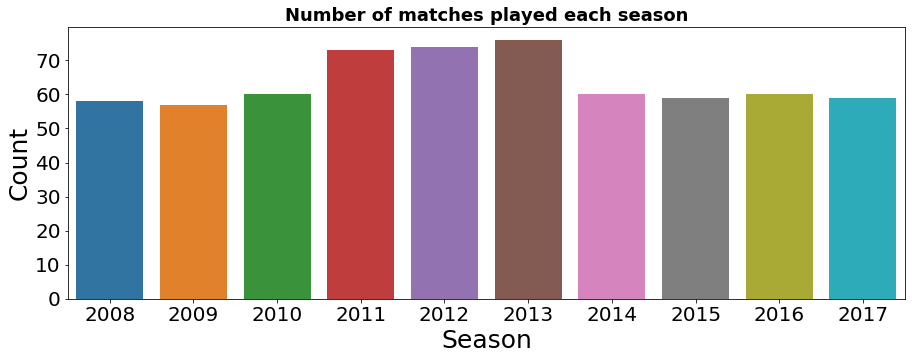

In [71]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

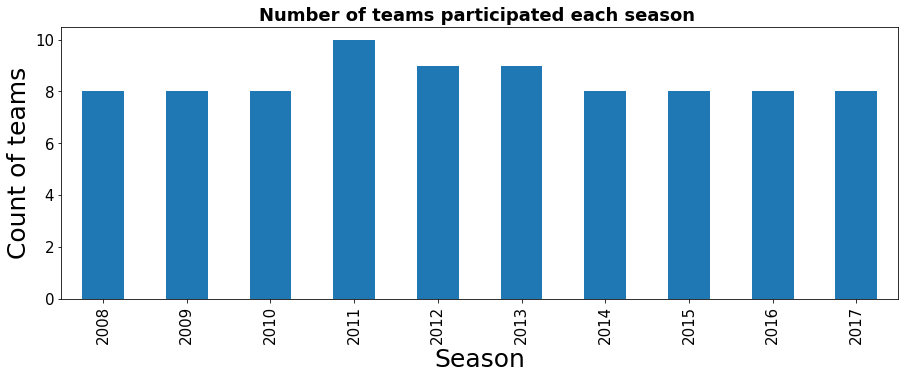

In [50]:

matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

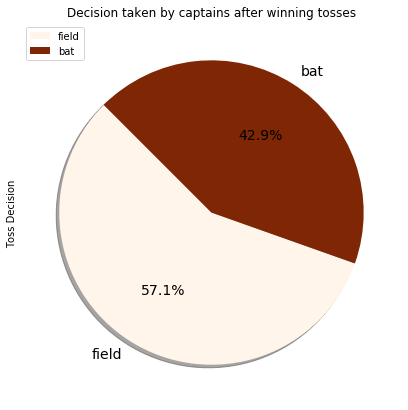

In [52]:
#Decision taken after winning the toss
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

Text(0, 0.5, 'Frequency')

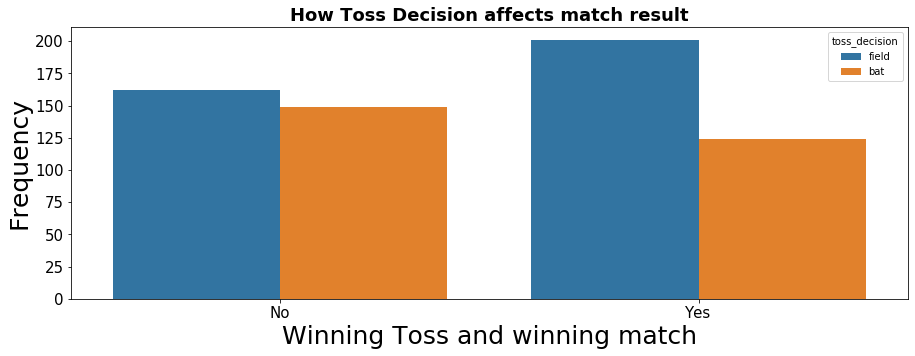

In [56]:
#How toss impacts the winner of the match
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

Text(0, 0.5, 'Count')

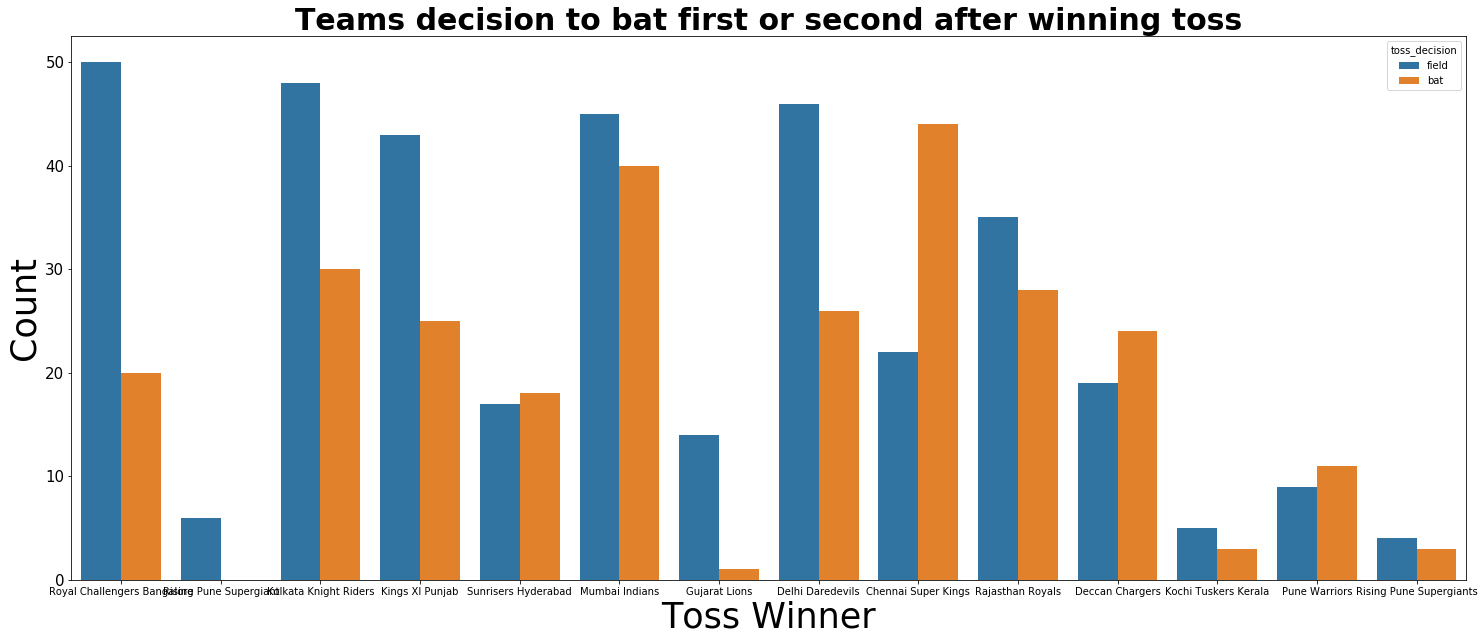

In [60]:
#WHich team prefers what after winning the toss
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text yticklabel objects>)

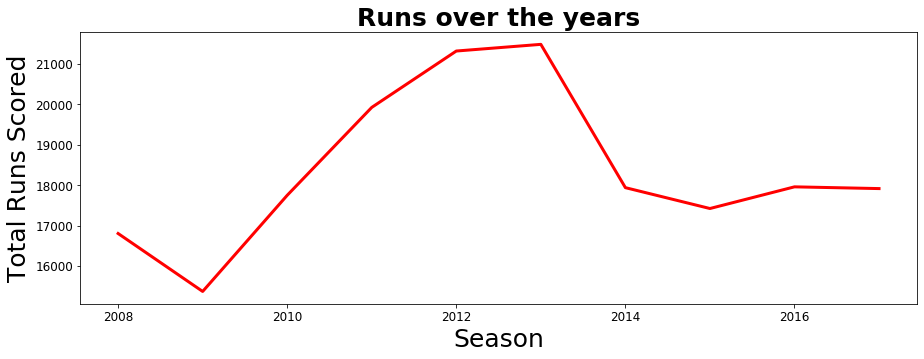

In [61]:
#Teams started to score more easily over the years
m_data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

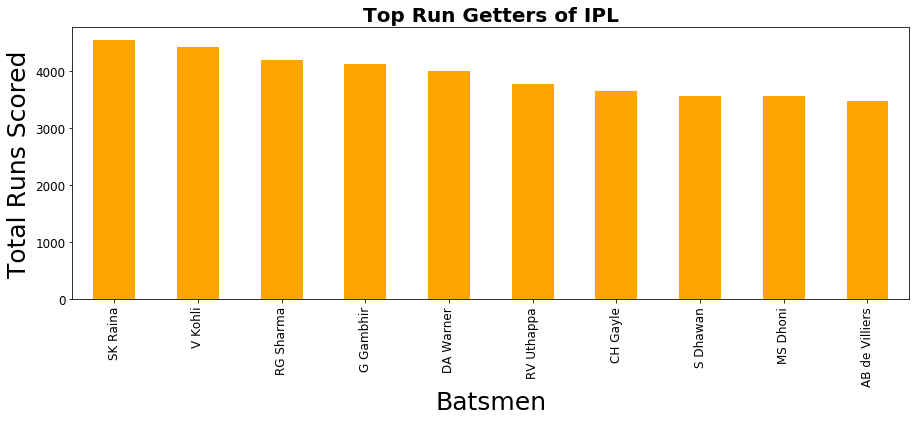

In [66]:

# let's plot the top 10 run getter so far in IPL
m_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text yticklabel objects>)

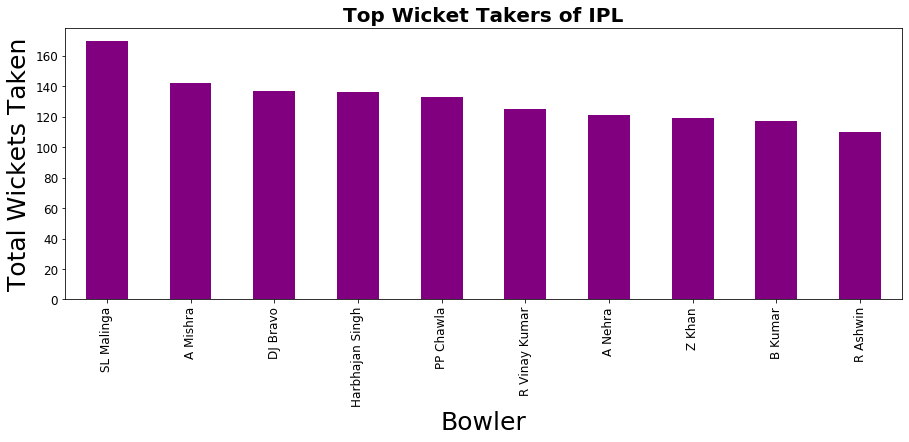

In [67]:
#Best Bowlers 
m_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

In [70]:
#Conclusion:
#Approx 60% times teams who have won tosses have decided to chase down.
#Teams winning tosses and choose to field first have won most number of times.
#Most of the teams field first after winning the toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.
# Chris Gayle has so far won the most number of MoM awards followed by Yusuf Pathan. Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches
# Suresh Raina is the leading run scorer and also is the most valueable player in the IPL followed by Virat Kohli
# Malinga is the best bowler followed by Amit Mishra and DJ Bravo.The top-10 consists of 6 fast bowlers and 4 spinners in which 2 are off-spinners and 2 leggies
# Dinesh Kartik is the best fielder followed by Ms Dhoni with the maximum number of dismissals. Here we can see that wicket-keepers have the maximum involvement in terms of dismissals
#10 teams played in 2011 and 9 teams each in 2012 and 2013.This explains why 2011-2013 have seen more matches being played than other seasons.
# Maximum number of the matches have been played in Mumbai followed by Bangalore and then Kolkata. 
# Mumbai have won the maximum number of cups followed by Chennai and the Kolkata.
# If we see the overall performance of players then Suresh Raina provides maximum value followed by Rohit Sharma and Virat Kohli

